In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Часть первая: Знакомство с Pandas.


*   Вывести первые строки таблицы с помощью метода head
*   Определите количество строк и столбцов в датафрейме (атрибут shape)
*   Замените в таблице значения "—" на значения NaN
*   Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"
*   Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
*   Удалите из таблицы данные по всей стране, последняя строчка таблицы
*   Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)
*   Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине
*   В каком регионе была самая высокая рождаемость в 2014 году?
*   Постройте столбцовую диаграмму рождаемости по регионам в 2019 году






In [ ]:
URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
data = pd.read_html(URL , match='Коефіцієнт народжуваності в регіонах України', index_col=0)
#data = pd.read_html(URL , attrs = {"id": "collapsibleTable6"})


In [ ]:
data[0].head(5)


,1950,1960,1970,1990,2000,2012,2014,2019
Регіон,,,,,,,,
Крим,230.0,206.0,160.0,130,73,126,—,—
Вінницька,224.0,192.0,142.0,124,84,112,109,76
Волинська,247.0,250.0,179.0,153,112,148,141,101
Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
Донецька,271.0,214.0,140.0,109,61,98,82,—


In [ ]:
print("Shape of Dataframe\n" ,data[0].shape, "\n")

Shape of Dataframe
 (28, 8) 



In [ ]:
data[0] = data[0].replace('—', np.nan)
print("Replace '—' in Dataframe\n" ,data[0].head(5), "\n")

Replace '—' in Dataframe
                    1950   1960   1970  1990  2000  2012 2014 2019
Регіон                                                           
Крим              230.0  206.0  160.0   130    73   126  NaN  NaN
Вінницька         224.0  192.0  142.0   124    84   112  109   76
Волинська         247.0  250.0  179.0   153   112   148  141  101
Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
Донецька          271.0  214.0  140.0   109    61    98   82  NaN 



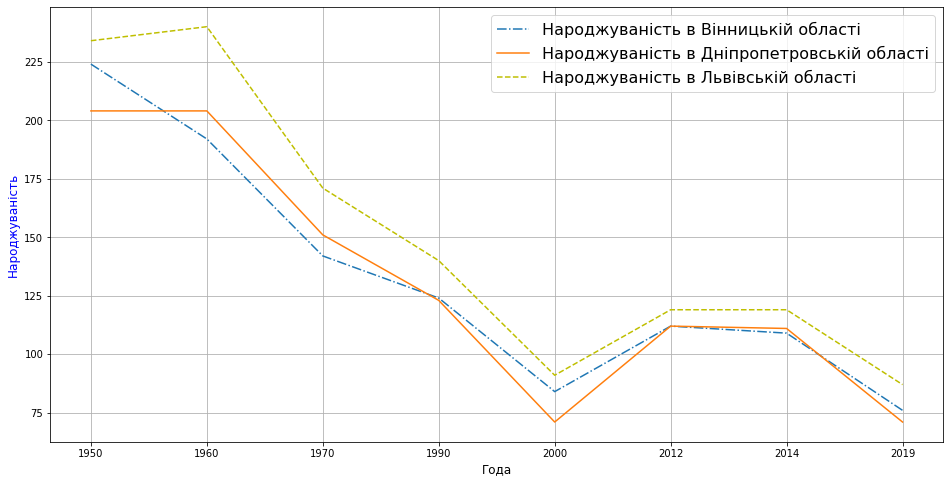

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(data[0].T['Вінницька'], label='Народжуваність в Вінницькій області', linestyle="-.")
plt.plot(data[0].T['Дніпропетровська'], label='Народжуваність в Дніпропетровській області')
plt.plot(data[0].T['Львівська'], label='Народжуваність в Львівській області', linestyle="--", color='y')
plt.xlabel('Года', fontsize='large', color='k')
plt.ylabel('Народжуваність', fontsize='large', color='b')
plt.legend(fontsize=16)
plt.grid()
plt.show()

In [ ]:
data[0].columns

Index(['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019'], dtype='object')

In [ ]:
for year in data[0].columns:
  data[0][year] = pd.Series(
      data = data[0][year],
      dtype=float)
data[0]['2014']


Регіон
Крим                   NaN
Вінницька            109.0
Волинська            141.0
Дніпропетровська     111.0
Донецька              82.0
Житомирська          120.0
Закарпатська         146.0
Запорізька           106.0
Івано-Франківська    122.0
Київська             121.0
Кіровоградська       108.0
Луганська             51.0
Львівська            119.0
Миколаївська         112.0
Одеська              123.0
Полтавська           100.0
Рівненська           148.0
Сумська               92.0
Тернопільська        109.0
Харківська           101.0
Херсонська           115.0
Хмельницька          112.0
Черкаська             98.0
Чернівецька          129.0
Чернігівська          90.0
Київ                 121.0
Севастополь            NaN
Україна              111.0
Name: 2014, dtype: float64

In [ ]:
np.sum(data[0].isnull())

1950    0
1960    0
1970    0
1990    0
2000    0
2012    0
2014    0
2019    0
dtype: int64

In [ ]:
data[0] = data[0].drop('Україна')
data[0]['2014']

Регіон
Крим                   NaN
Вінницька            109.0
Волинська            141.0
Дніпропетровська     111.0
Донецька              82.0
Житомирська          120.0
Закарпатська         146.0
Запорізька           106.0
Івано-Франківська    122.0
Київська             121.0
Кіровоградська       108.0
Луганська             51.0
Львівська            119.0
Миколаївська         112.0
Одеська              123.0
Полтавська           100.0
Рівненська           148.0
Сумська               92.0
Тернопільська        109.0
Харківська           101.0
Херсонська           115.0
Хмельницька          112.0
Черкаська             98.0
Чернівецька          129.0
Чернігівська          90.0
Київ                 121.0
Севастополь            NaN
Name: 2014, dtype: float64

In [ ]:
for year in data[0].columns:
  data[0][year].fillna(np.round(data[0][year].mean(), 2), inplace=True)
data[0]['1950']

Регіон
Крим                 230.00
Вінницька            224.00
Волинська            247.00
Дніпропетровська     204.00
Донецька             271.00
Житомирська          261.00
Закарпатська         314.00
Запорізька           219.00
Івано-Франківська    243.00
Київська             204.00
Кіровоградська       216.00
Луганська            262.00
Львівська            234.00
Миколаївська         211.00
Одеська              241.00
Полтавська           186.00
Рівненська           269.00
Сумська              216.00
Тернопільська        213.00
Харківська           197.00
Херсонська           208.00
Хмельницька          234.00
Черкаська            205.00
Чернівецька          247.00
Чернігівська         220.00
Київ                 231.04
Севастополь          231.04
Name: 1950, dtype: float64

In [ ]:
data[0]['2019'].mean()

80.17333333333335

In [ ]:
data[0]['2019'][data[0]['2019'] > data[0]['2019'].mean()]

Регіон
Волинська            101.0
Закарпатська         104.0
Івано-Франківська     88.0
Львівська             87.0
Одеська               88.0
Рівненська           107.0
Херсонська            81.0
Чернівецька           92.0
Київ                 110.0
Name: 2019, dtype: float64

In [ ]:
sort_index = data[0]['2014'].sort_values()
sort_index[-1:]

Регіон
Рівненська    148.0
Name: 2014, dtype: float64

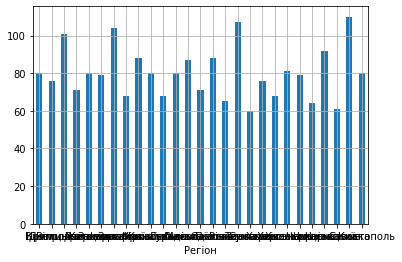

In [ ]:
data[0]['2019'].plot.bar(rot=0, grid=True)

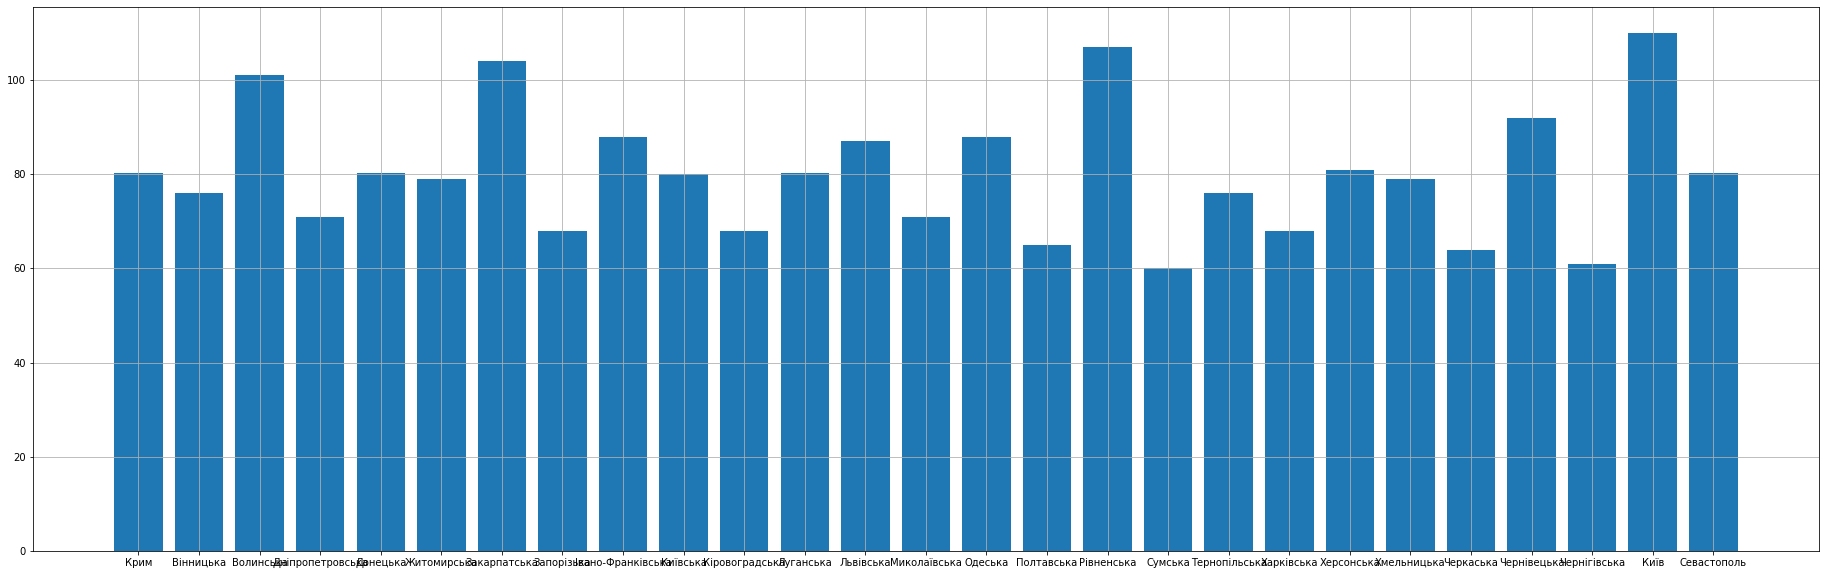

In [ ]:
plt.figure(figsize=(32, 10))
plt.bar(data[0].index, data[0]['2019'])
plt.grid()
plt.show()

In [ ]:
data[0]['2019']

Регіон
Крим                  80.17
Вінницька             76.00
Волинська            101.00
Дніпропетровська      71.00
Донецька              80.17
Житомирська           79.00
Закарпатська         104.00
Запорізька            68.00
Івано-Франківська     88.00
Київська              80.00
Кіровоградська        68.00
Луганська             80.17
Львівська             87.00
Миколаївська          71.00
Одеська               88.00
Полтавська            65.00
Рівненська           107.00
Сумська               60.00
Тернопільська         76.00
Харківська            68.00
Херсонська            81.00
Хмельницька           79.00
Черкаська             64.00
Чернівецька           92.00
Чернігівська          61.00
Київ                 110.00
Севастополь           80.17
Name: 2019, dtype: float64

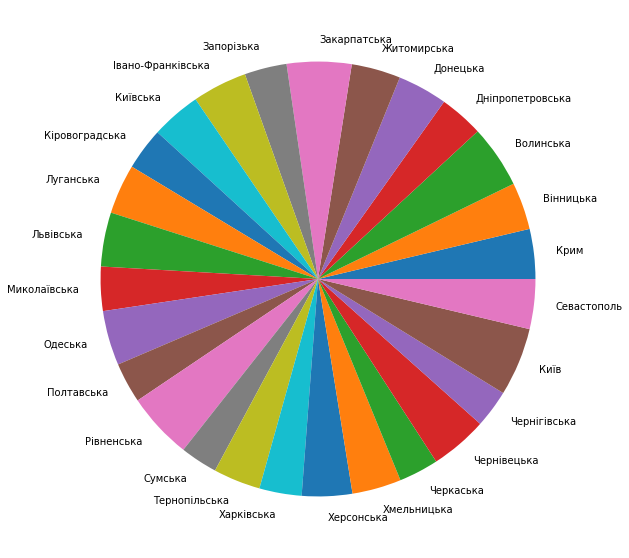

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(data[0]['2019'], labels=data[0].index);
plt.show();